## Customer360 : Capstone Project - June 2024

### A Machine Learning Based 'Credit Card User(Customer) Segmentation' Project .


#### Designed, Developed by -


##### Ashrith Biradar
##### Derrick Tharun
##### Deepak S

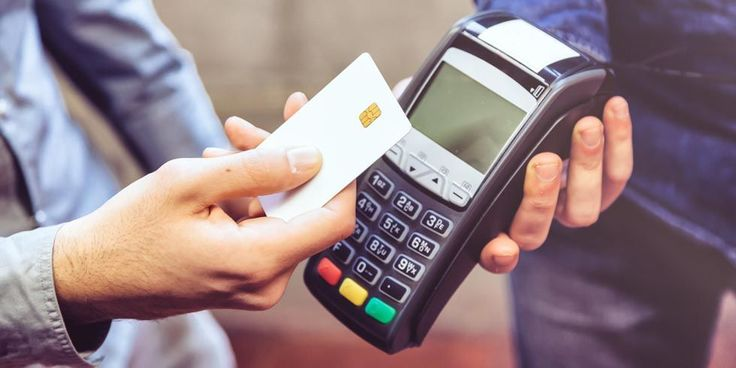

### Importing Necessary Libraries and Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore") 

In [4]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN,SpectralClustering

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
customer_data = pd.read_csv(r"C:\Users\Derrick T\Downloads\PythonMastery\Customer Data.csv")

In [7]:
customer_data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


### Understanding the Data

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
customer_data.shape

(8950, 18)

In [10]:
customer_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
#Checking for Null Values

In [12]:
customer_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### EDA

In [13]:
#Replacing Null Values with the Mean Value since it is a numeric feature

In [8]:
customer_data["MINIMUM_PAYMENTS"] = customer_data["MINIMUM_PAYMENTS"].fillna(customer_data["MINIMUM_PAYMENTS"].mean())

In [9]:
customer_data["CREDIT_LIMIT"] = customer_data["CREDIT_LIMIT"].fillna(customer_data["CREDIT_LIMIT"].mean())

In [16]:
#Drop irrelevant columns

In [10]:
customer_data.drop(columns=["CUST_ID"],axis=1,inplace=True)

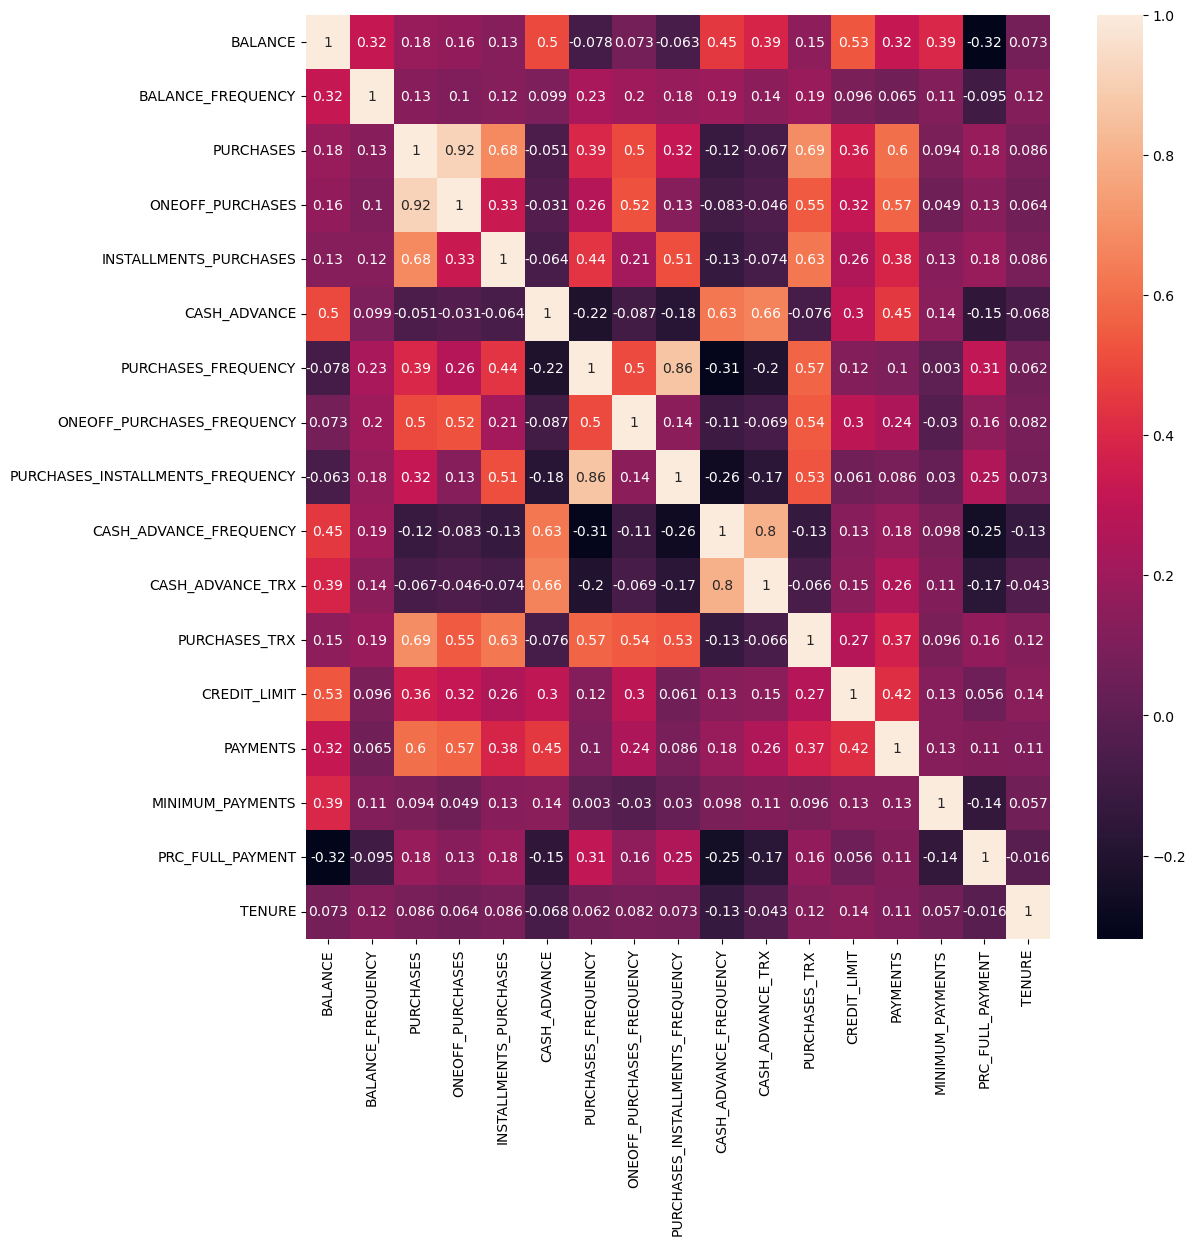

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(customer_data.corr(), annot=True)
plt.show()

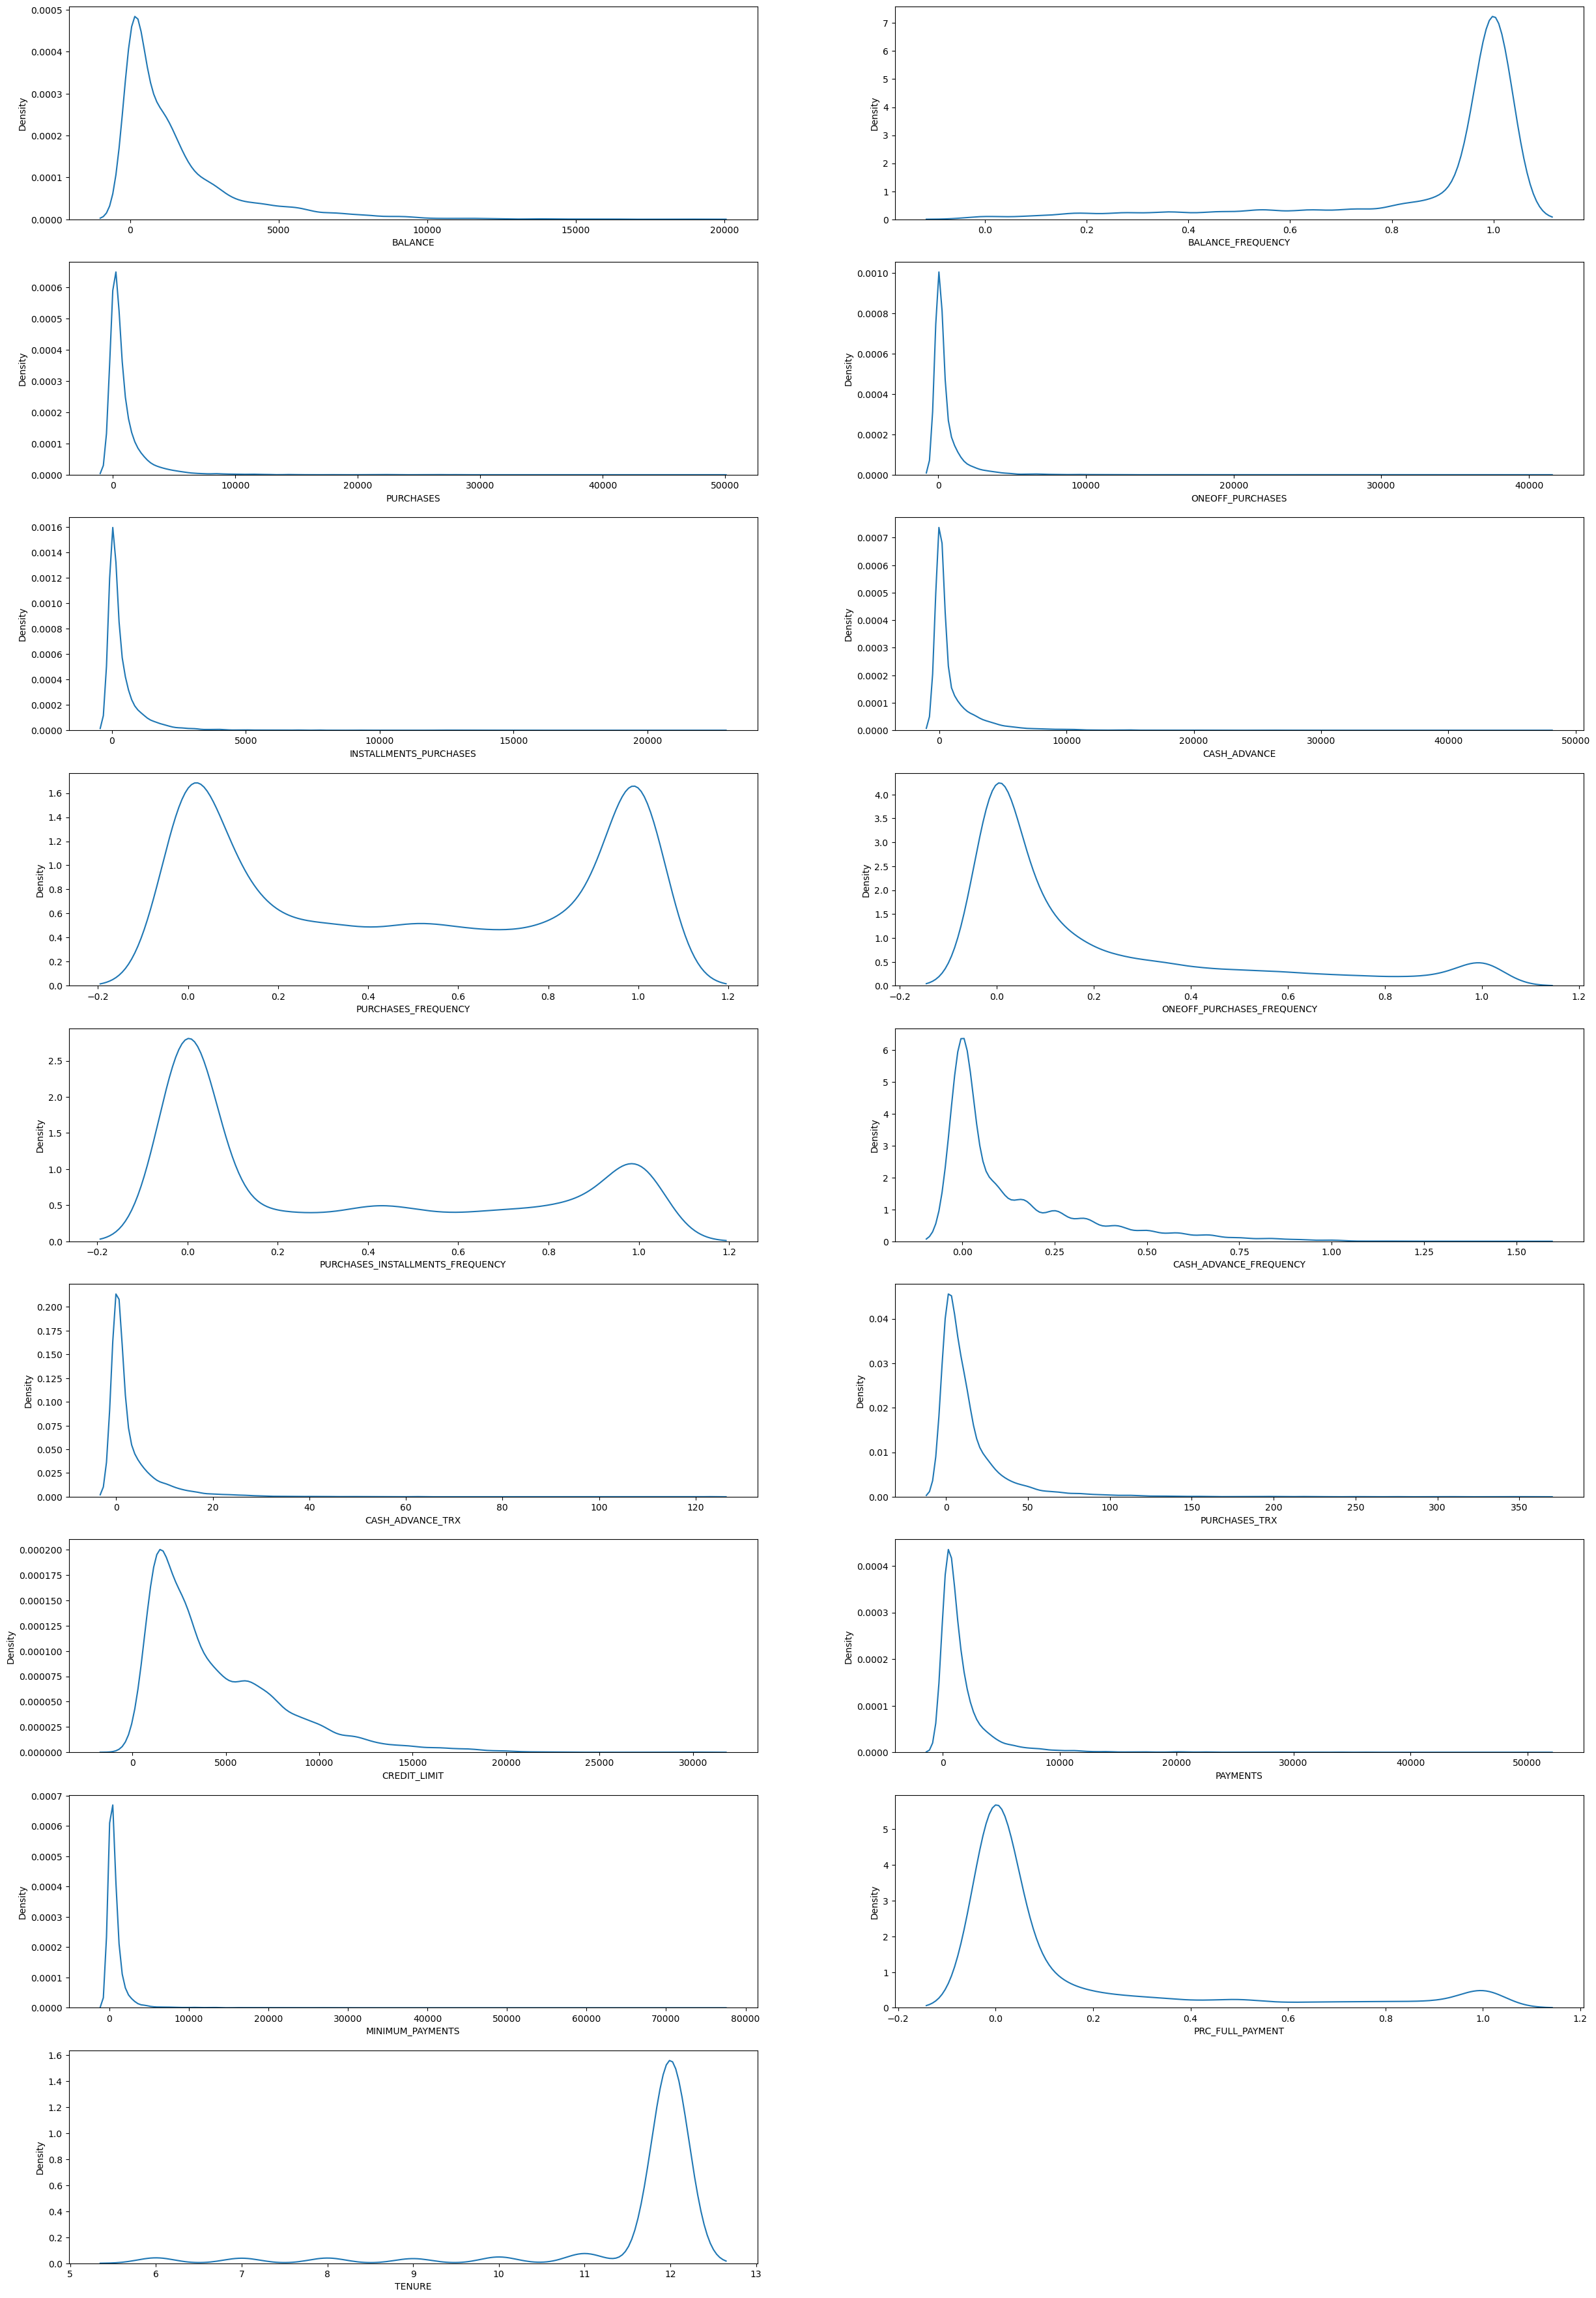

In [27]:
plt.figure(figsize=(30,45))
for i, col in enumerate(customer_data.columns):
    if customer_data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(customer_data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

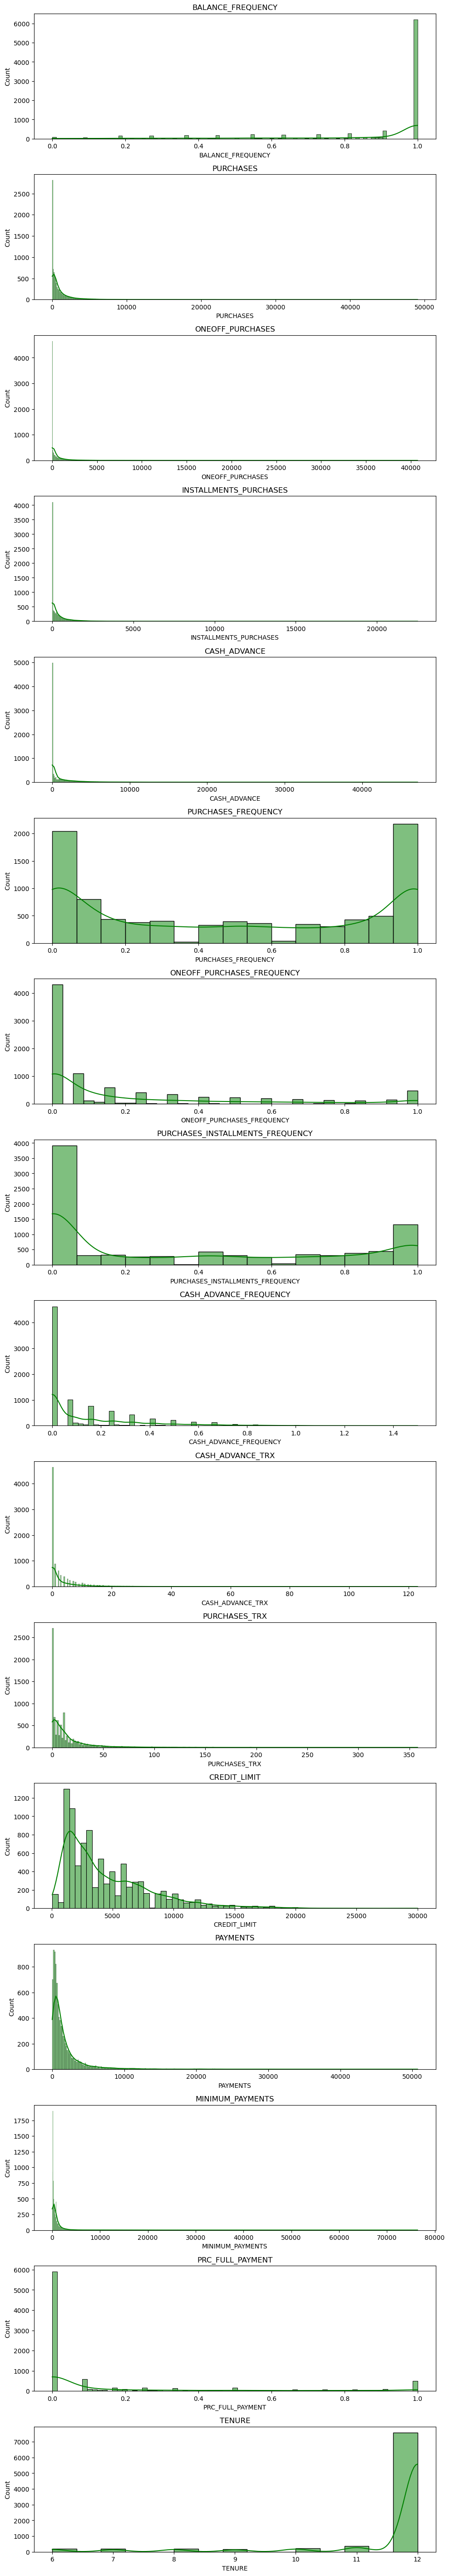

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set up the figure
plt.figure(figsize=(10, 60))

# Loop through each column (excluding the first one which is CUST_ID)
for i in range(1, len(customer_data.columns)):
    plt.subplot(17, 1, i)
    sns.histplot(customer_data[customer_data.columns[i]], kde=True, color='g')
    plt.title(customer_data.columns[i])

plt.tight_layout()
plt.show()


### Scaling

In [11]:
scalar=StandardScaler()

In [12]:
scaled_data = scalar.fit_transform(customer_data)

### Dimensionality Reduction

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_data

,PCA1,PCA2
0,-1.682211,-1.076442
1,-1.138253,2.506518
2,0.969695,-0.383508
3,-0.873653,0.043140
4,-1.599417,-0.688563
...,...,...
8945,-0.359635,-2.016150
8946,-0.564378,-1.639131
8947,-0.926207,-1.810788
8948,-2.336539,-0.657953


In [ ]:
## Customer 0: Has values of -1.682218 for PCA1 and -1.076447 for PCA2. 
#This means that this customer's data point is positioned in the lower-left quadrant of the new 2D space, 
#indicating strong deviations along both principal components in the negative direction.

## Customer 1: Has values of -1.138311 for PCA1 and 2.506471 for PCA2. 
#This indicates that this customer's data point is positioned in the upper-left quadrant, 
#with a strong deviation in the positive direction along PCA2 and a negative deviation along PCA1.

### Determining 'K' - Number of Clusters using the ' Elbow method'

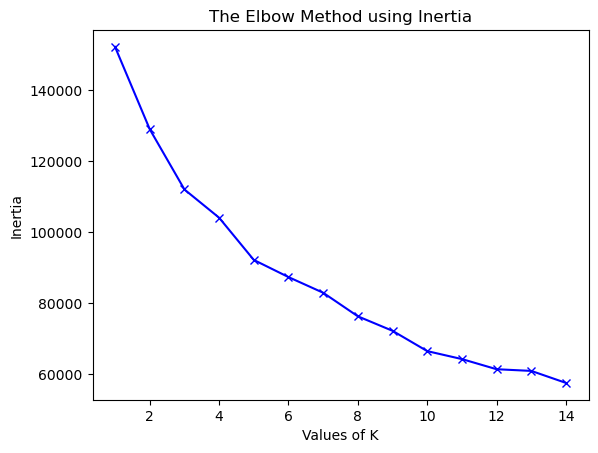

In [14]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_data))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [15]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_data)
pca_data_kmeans= pd.concat([pca_data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

### Clustered Dataframe Visualization

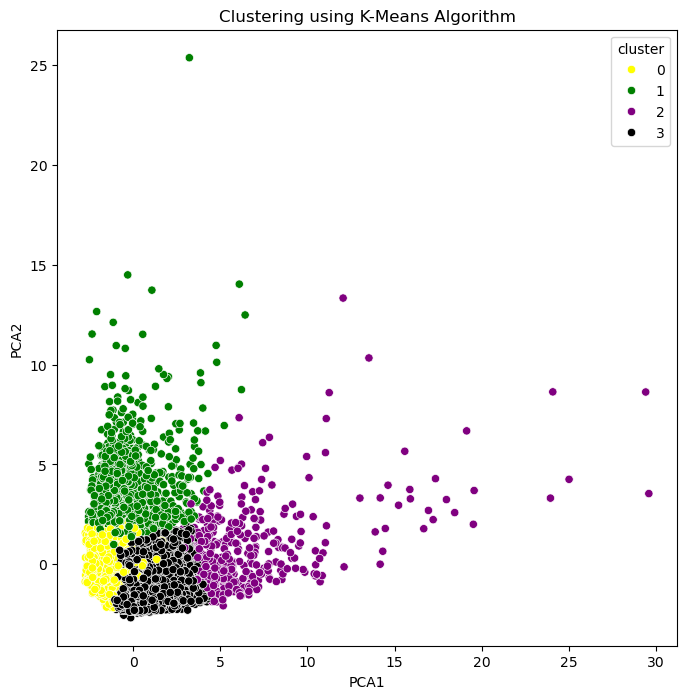

In [16]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_data_kmeans,palette=['yellow','green','purple','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [17]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[customer_data.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[customer_data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1012.351005,0.789911,269.800322,209.902555,60.165058,596.359298,0.169751,0.086305,0.080176,0.114949,2.127644,2.898288,3277.554830,975.038698,586.721088,0.077828,11.445871
1,4601.214652,0.968442,503.252902,320.970734,182.366964,4518.911273,0.288255,0.139165,0.185987,0.484470,14.279399,7.677231,7546.667678,3482.883797,2007.157923,0.034830,11.387823
2,3538.323234,0.987068,7628.896482,5057.499133,2572.843133,650.374765,0.946992,0.737181,0.789518,0.070460,2.065060,89.000000,9661.566265,7229.381878,1967.004778,0.287582,11.951807
3,890.526458,0.934379,1229.977441,590.034325,640.217574,209.297616,0.884592,0.296196,0.711238,0.042463,0.787158,21.997919,4205.966187,1326.579256,648.425404,0.269176,11.594233


In [18]:
cluster_data = pd.concat([customer_data,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [19]:
cluster_data['Cluster'].unique()

array([0, 1, 3, 2])

<Axes: xlabel='Cluster', ylabel='count'>

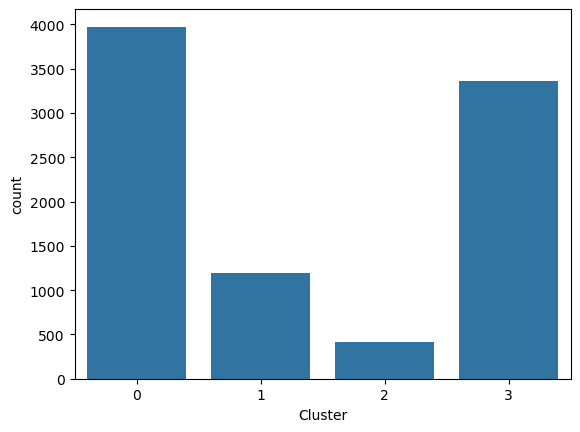

In [20]:
sns.countplot(x='Cluster', data=cluster_data)

In [ ]:
# Visually compare how each feature varies across the identified clusters.
# This helps in understanding the characteristics that distinguish one cluster from another.

In [ ]:
# for c in cluster_df.drop(['Cluster'],axis=1):
#     grid= sns.FacetGrid(cluster_df, col='Cluster')
#     grid= grid.map(plt.hist, c)
# plt.show()

### Saving the trained model 

In [55]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [56]:
cluster_data.to_csv("Clustered_Customer_Data.csv")

### Decision Tree classifier to classify customers in training data based on the assigned clusters

In [46]:
X = cluster_data.drop(['Cluster'],axis=1)
y= cluster_data[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [47]:
X_train.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3670,49.789963,1.000000,700.00,0.0,700.00,0.0,1.0,0.0,0.9,0.0,0,10,1000.0,658.477880,160.909873,1.000000,10
2731,21.328087,0.545455,512.35,0.0,512.35,0.0,1.0,0.0,1.0,0.0,0,18,2000.0,716.296679,99.218174,0.545455,12


In [48]:
X_test.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8319,289.220297,1.00,0.00,0.00,0.00,1048.868332,0.00,0.000,0.000,0.083333,3,0,1200.0,59.150211,288.255952,0.0,12
3451,634.088475,0.75,2194.29,2065.25,129.04,0.000000,0.75,0.625,0.375,0.000000,0,14,10000.0,408.701268,201.735817,0.2,8


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

In [51]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  94    7    0    1]
 [  18  965   23   15]
 [   2   22 1139   27]
 [   0   22   26  324]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.95      0.95      0.95      1021
           2       0.96      0.96      0.96      1190
           3       0.88      0.87      0.88       372

    accuracy                           0.94      2685
   macro avg       0.90      0.92      0.91      2685
weighted avg       0.94      0.94      0.94      2685



#### For Instance,

#### For class 0: Out of 102 actual instances, 94 were correctly classified, 7 were misclassified as class 1, 0 as class 2, and 1 as class 3.
#### For class 1: Out of 1021 actual instances, 965 were correctly classified, 18 were misclassified as class 0, 23 as class 2, and 15 as class 3.

In [53]:
import pickle
filename = 'customer_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [54]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.939292364990689 % Acuuracy


In [21]:
cluster_1_data = cluster_data[cluster_data["Cluster"]==0]
cluster_1_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [23]:
cluster_2_data = cluster_data[cluster_data["Cluster"]==1]
cluster_2_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,1
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,1
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,1
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,1
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,1
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,1
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,1


In [33]:
cluster_3_data = cluster_data[cluster_data["Cluster"]==2]
cluster_3_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,2
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,2
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,2
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,2
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,2
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,2
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,2


In [25]:
cluster_4_data = cluster_data[cluster_data["Cluster"]==0]
cluster_4_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [30]:
cluster_1_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.0
mean,1012.187341,0.789903,269.916492,209.959477,60.224172,596.059168,0.169938,0.086325,0.080367,0.114891,2.126573,2.901359,3277.465471,974.818265,586.533617,0.077914,11.446150,0.0
std,1097.468937,0.295191,467.739812,448.108865,155.065351,918.979960,0.188029,0.135723,0.148518,0.137006,2.964312,3.935656,2655.407874,1578.878971,1314.666675,0.205729,1.416701,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,0.0
25%,82.529606,0.547980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,268.299475,160.872896,0.000000,12.000000,0.0
50%,764.575875,1.000000,79.000000,0.000000,0.000000,117.959268,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,534.729290,310.399040,0.000000,12.000000,0.0
75%,1506.335053,1.000000,339.545000,211.892500,50.995000,935.490422,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.587502,658.023702,0.000000,12.000000,0.0
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,23.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000,0.0


In [31]:
cluster_2_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.0
mean,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312,1.0
std,2754.575494,0.091212,862.938799,666.283102,416.133434,3622.443388,0.354104,0.228871,0.311182,0.228421,12.299926,14.043625,3744.186712,4210.279433,3888.093906,0.103212,1.471048,0.0
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,1.0
25%,2480.135387,1.000000,0.000000,0.000000,0.000000,2321.162031,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1214.469989,752.614680,0.000000,12.000000,1.0
50%,4275.708869,1.000000,85.730000,0.000000,0.000000,3653.331329,0.083333,0.000000,0.000000,0.500000,11.500000,1.000000,7000.000000,1963.135909,1309.935203,0.000000,12.000000,1.0
75%,6239.276755,1.000000,654.852500,330.352500,144.625000,5592.000447,0.571429,0.166667,0.333333,0.666667,17.000000,10.000000,10000.000000,4021.265959,2043.939591,0.000000,12.000000,1.0
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000,1.0


In [35]:
cluster_3_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.0
mean,3541.379710,0.987006,7645.023729,5067.502591,2578.973923,653.524280,0.946735,0.736716,0.789709,0.070801,2.075061,89.188862,9670.823245,7250.176184,1973.202588,0.288370,11.951574,2.0
std,3337.826501,0.058797,5961.528067,5361.412545,2718.044906,1867.078776,0.134008,0.290821,0.312127,0.152906,6.058107,56.220856,4826.663132,6854.384572,5047.704952,0.393237,0.448924,0.0
min,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,108.937025,0.000000,6.000000,2.0
25%,878.010252,1.000000,4562.570000,2252.370000,855.750000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,52.000000,6000.000000,3581.048471,247.085679,0.000000,12.000000,2.0
50%,2492.726282,1.000000,5819.460000,3684.520000,1818.700000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,79.000000,9000.000000,5389.673400,726.696049,0.000000,12.000000,2.0
75%,5193.415429,1.000000,8519.020000,6182.780000,3176.000000,283.476295,1.000000,1.000000,1.000000,0.083333,1.000000,110.000000,12000.000000,8317.163283,1912.298544,0.666667,12.000000,2.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,2.0


In [36]:
cluster_4_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.0
mean,1012.187341,0.789903,269.916492,209.959477,60.224172,596.059168,0.169938,0.086325,0.080367,0.114891,2.126573,2.901359,3277.465471,974.818265,586.533617,0.077914,11.446150,0.0
std,1097.468937,0.295191,467.739812,448.108865,155.065351,918.979960,0.188029,0.135723,0.148518,0.137006,2.964312,3.935656,2655.407874,1578.878971,1314.666675,0.205729,1.416701,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,0.0
25%,82.529606,0.547980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,268.299475,160.872896,0.000000,12.000000,0.0
50%,764.575875,1.000000,79.000000,0.000000,0.000000,117.959268,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,534.729290,310.399040,0.000000,12.000000,0.0
75%,1506.335053,1.000000,339.545000,211.892500,50.995000,935.490422,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.587502,658.023702,0.000000,12.000000,0.0
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,23.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000,0.0


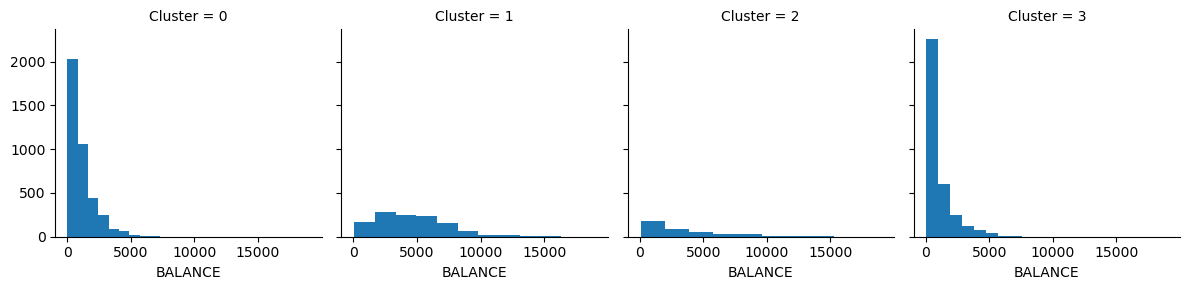

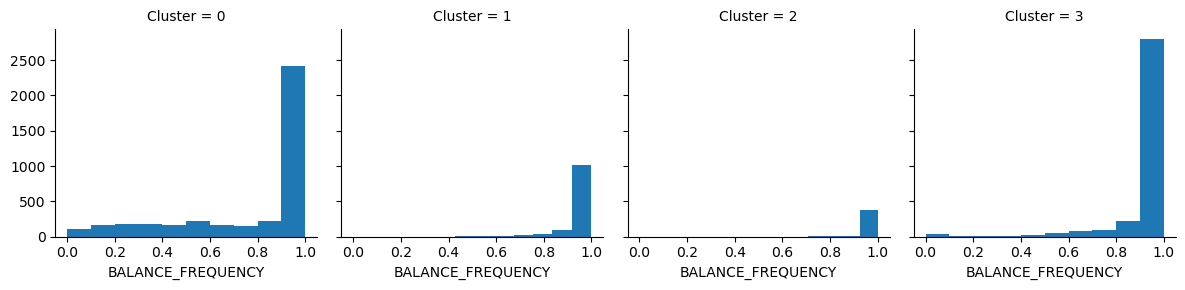

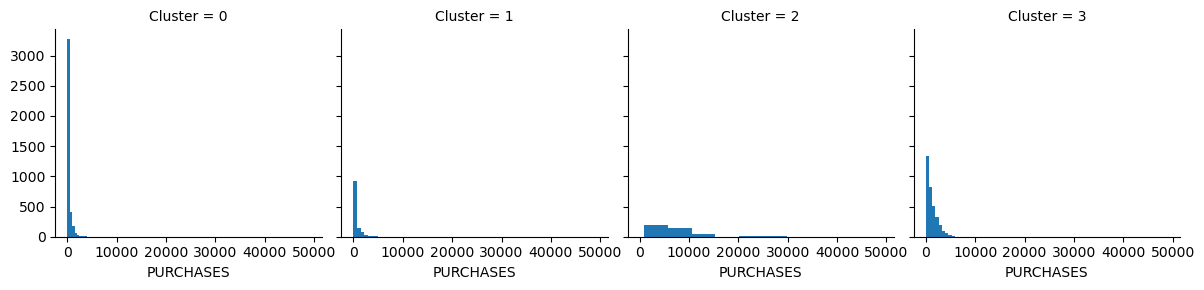

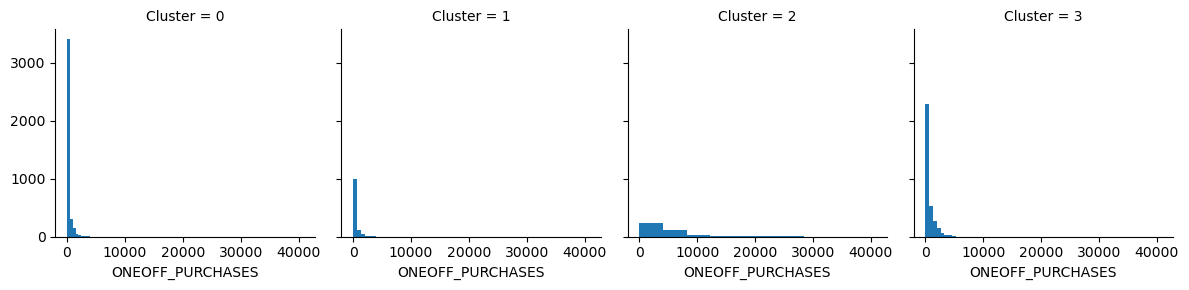

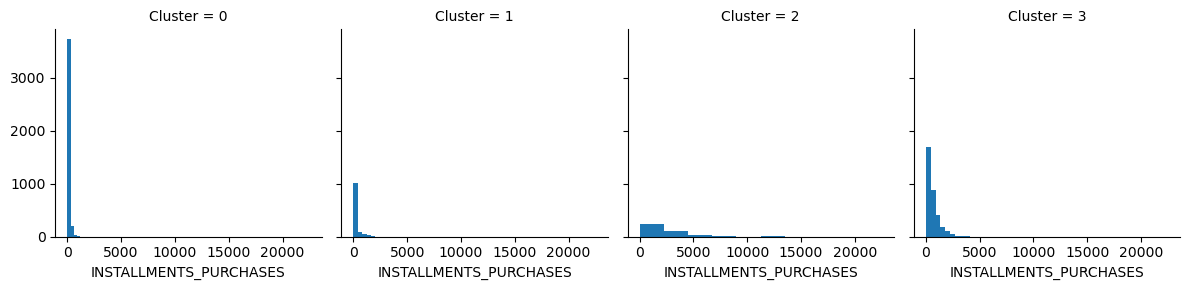

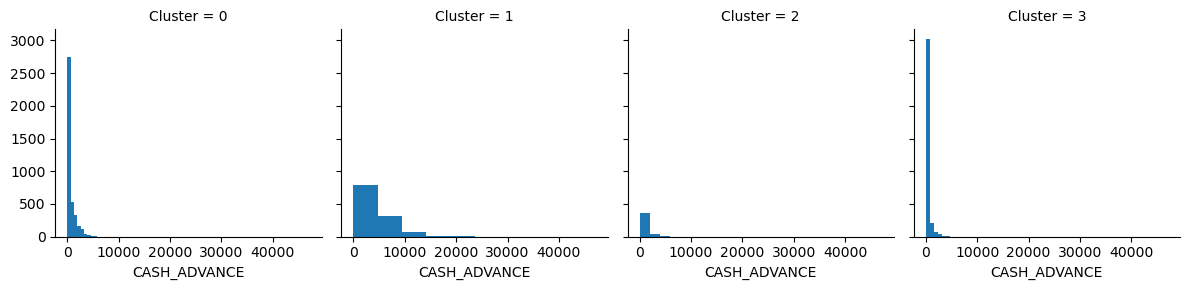

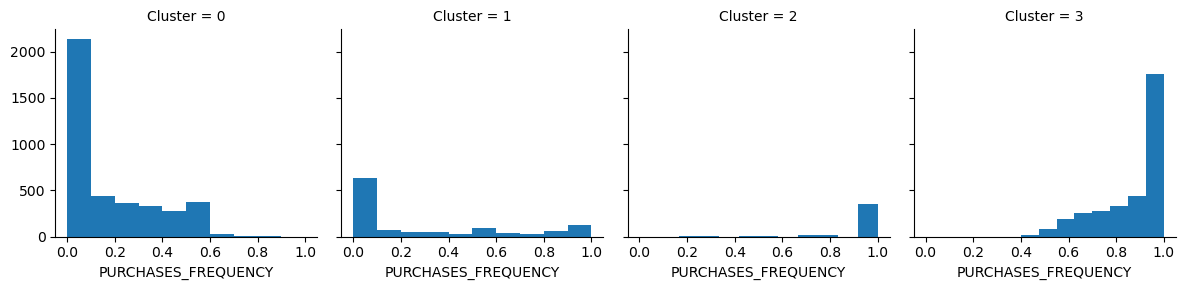

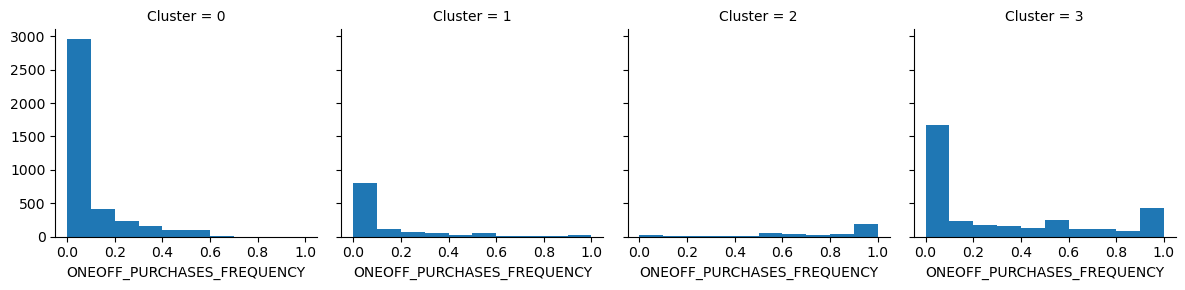

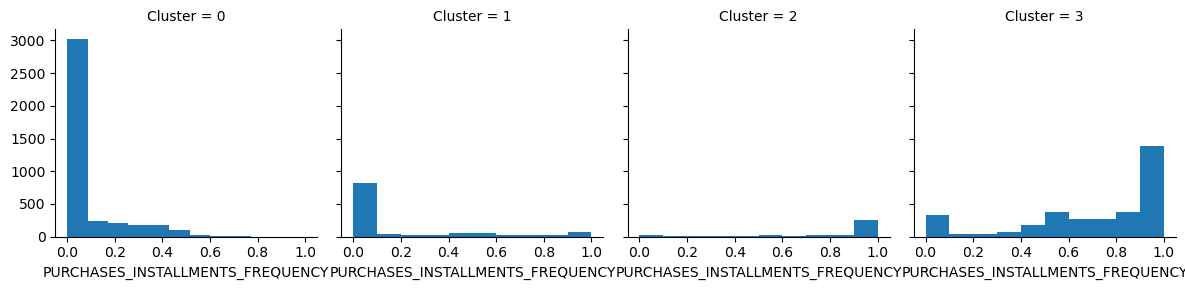

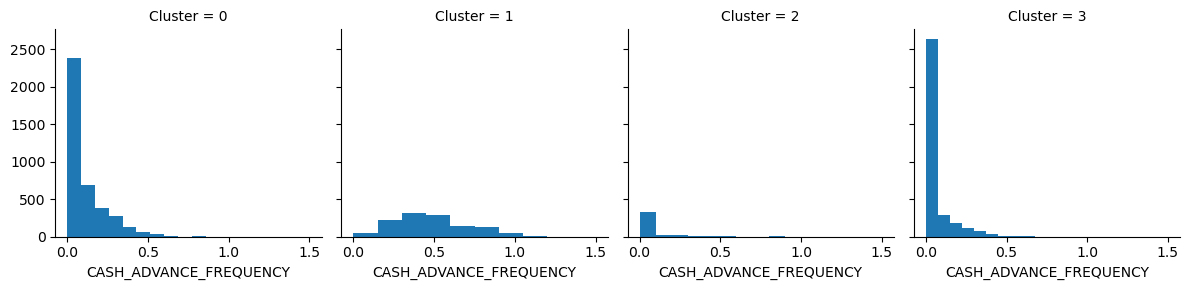

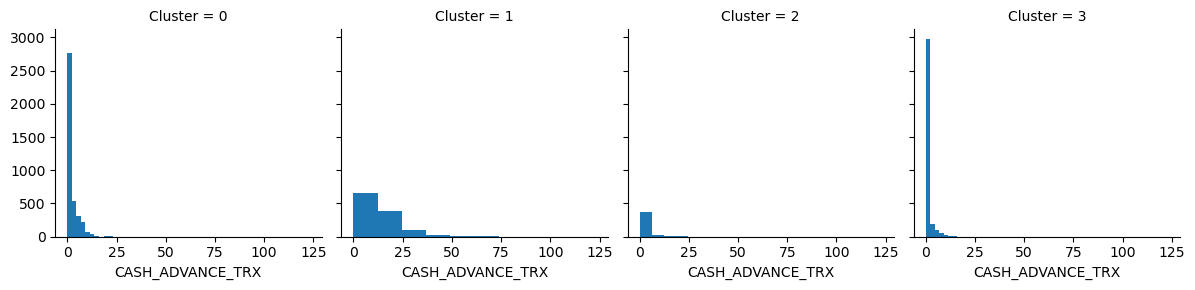

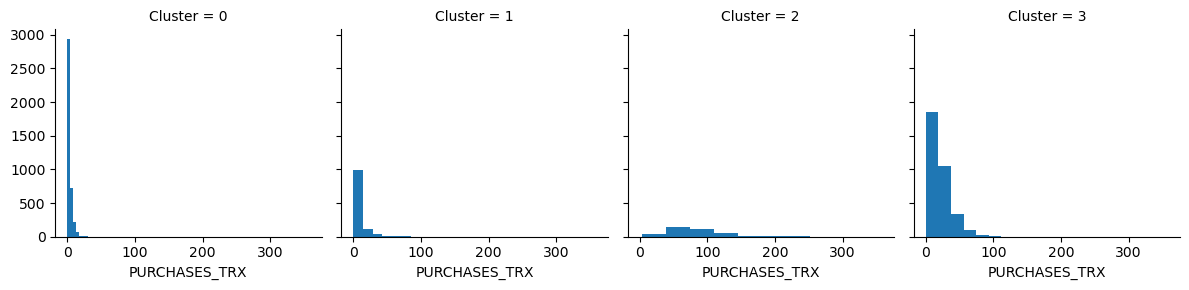

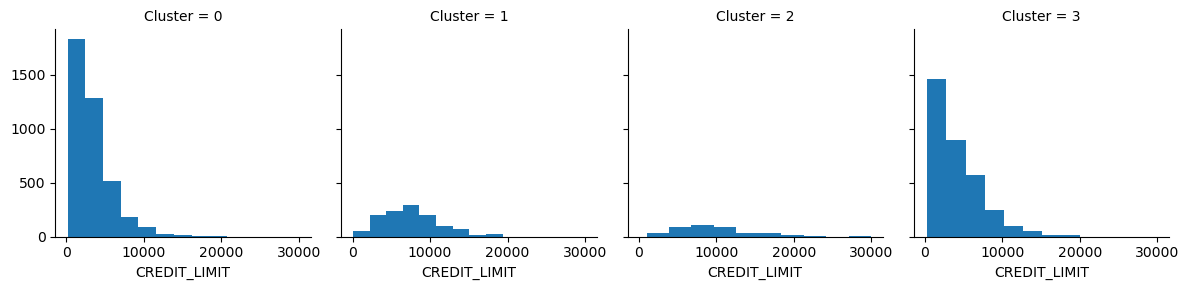

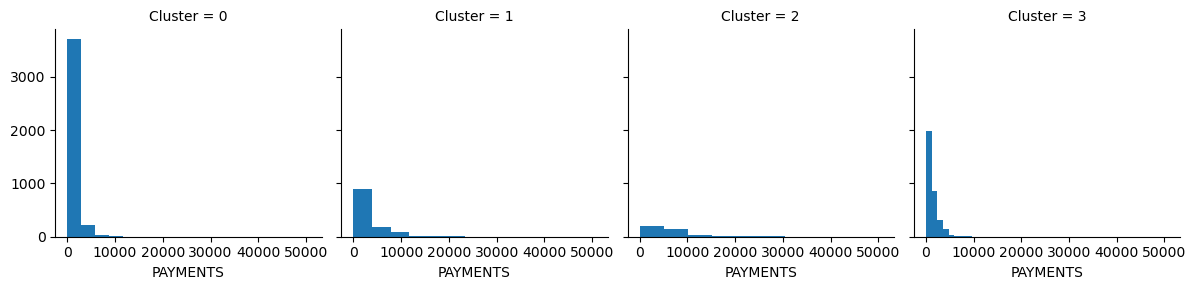

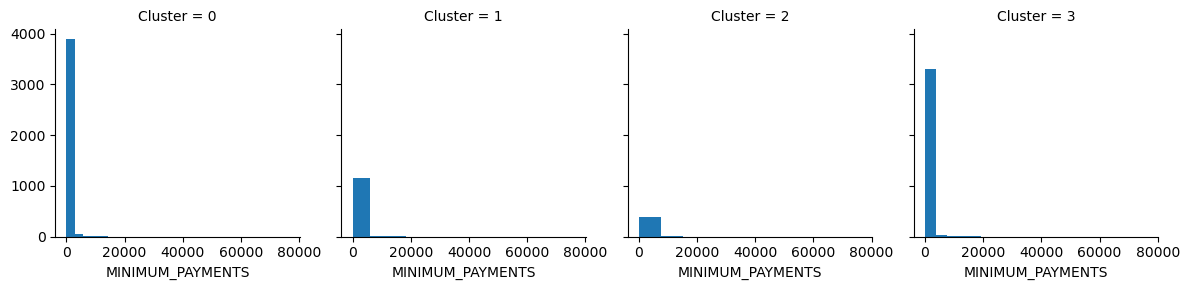

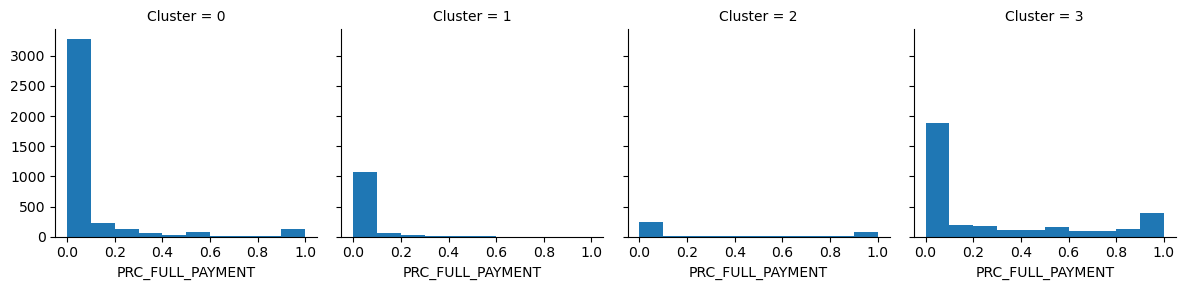

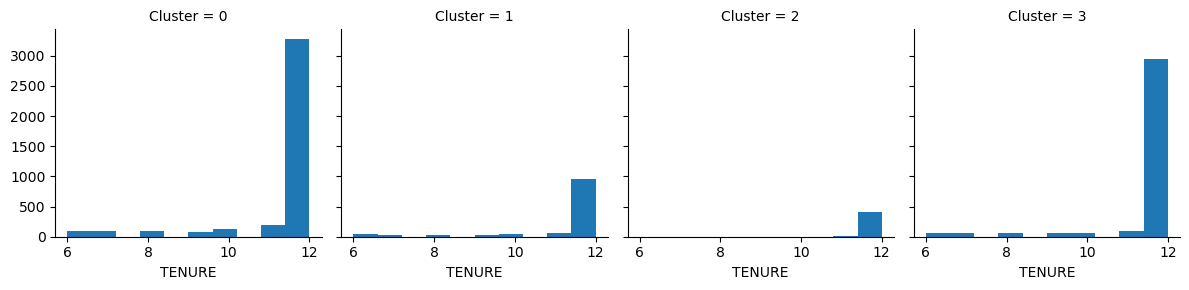

In [37]:
for c in cluster_data.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_data, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()